### Image filtering

1. Linear Filters
    1. Gaussian
    2. Box 
    3. Sobel
2. Non Linear
    1. Mean
    2. Median

In [3]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Gaussian

Text(0.5, 1.0, 'Gaussian Blurred Image')

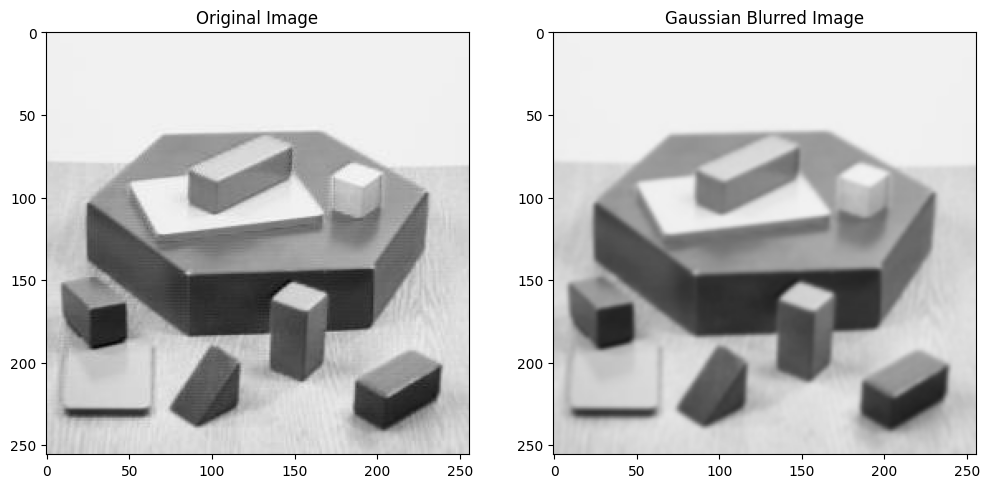

In [7]:
image = cv2.imread("resources/input.jpg")
blurred = cv2.GaussianBlur(image, (5,5),0)

fig = plt.figure(figsize=(12,6))
fig.add_subplot(1,2,1)
plt.imshow(image)
plt.title('Original Image')
fig.add_subplot(1,2,2)
plt.imshow(blurred)
plt.title('Gaussian Blurred Image')

### 2. Box Filter

In [10]:
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
kernel = np.ones((5,5), np.float32) / 25
print(kernel)
filtered_img = cv2.filter2D(img, -1, kernel)

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


Text(0.5, 1.0, 'Box Filtered Image')

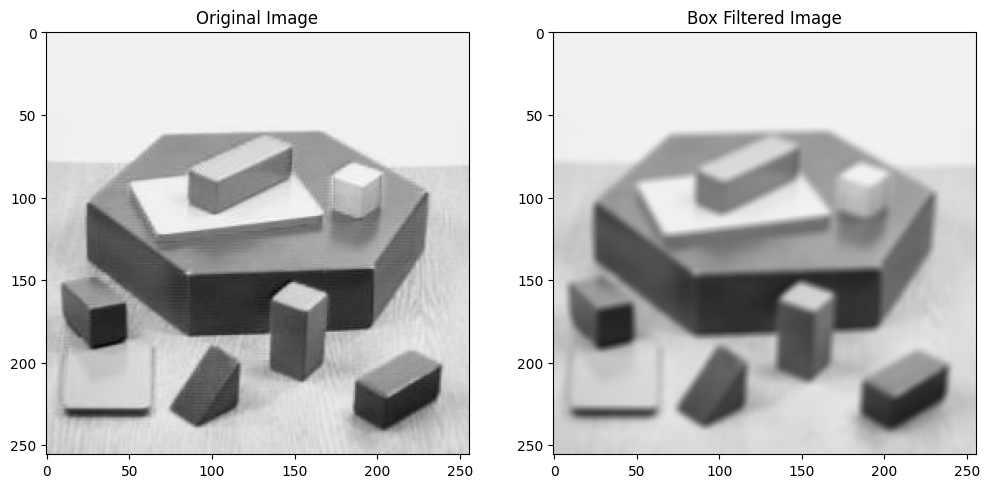

In [11]:
fig = plt.figure(figsize=(12,6))
fig.add_subplot(1,2,1)
plt.imshow(img)
plt.title('Original Image')
fig.add_subplot(1,2,2)
plt.imshow(filtered_img)
plt.title('Box Filtered Image')

### 3. Sobel Filter

In [12]:
image = cv2.imread('resources\input.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Gaussian Blur to reduce noise
blurred_image = cv2.GaussianBlur(image, (3, 3), 0)

# Apply Sobel filter in the x direction
sobel_x = cv2.Sobel(blurred_image, cv2.CV_64F, 1, 0, ksize=3)

# Apply Sobel filter in the y direction
sobel_y = cv2.Sobel(blurred_image, cv2.CV_64F, 0, 1, ksize=3)

# Combine the two gradients
sobel_combined = cv2.magnitude(sobel_x, sobel_y)

Text(0.5, 1.0, 'Sobel Combined')

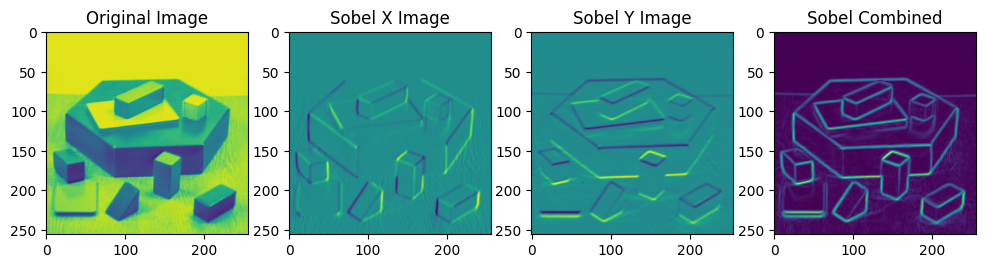

In [18]:
fig = plt.figure(figsize=(12,6))
fig.add_subplot(1,4,1)
plt.imshow(image)
plt.title('Original Image')
fig.add_subplot(1,4,2)
plt.imshow(sobel_x)
plt.title('Sobel X Image')
fig.add_subplot(1,4,3)
plt.imshow(sobel_y)
plt.title('Sobel Y Image')
fig.add_subplot(1,4,4)
plt.imshow(sobel_combined)
plt.title("Sobel Combined")

### 4. Mean and Median Filter

Text(0.5, 1.0, 'Median Filter')

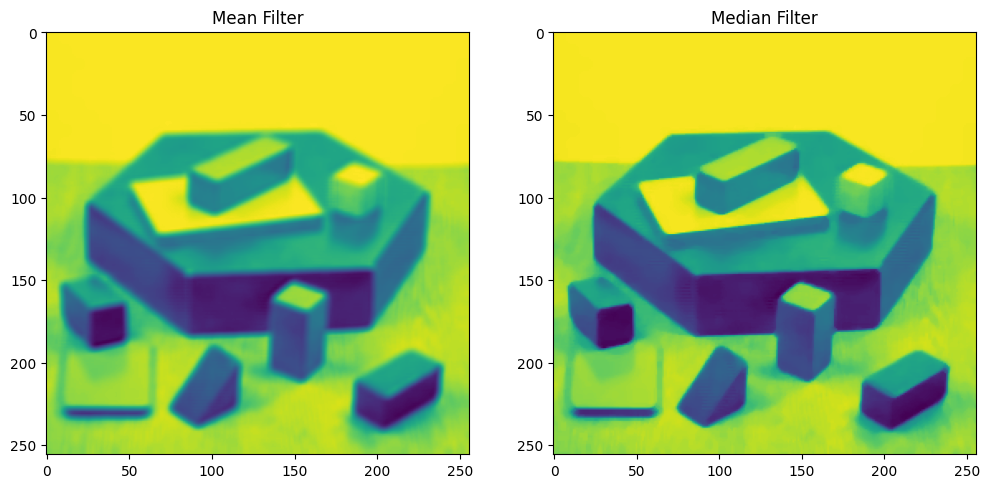

In [19]:
mean_filtered_image = cv2.blur(image, (5,5))
median_filtered_image = cv2.medianBlur(image, 5)

fig = plt.figure(figsize=(12,6))
fig.add_subplot(1,2,1)
plt.imshow(mean_filtered_image)
plt.title('Mean Filter')
fig.add_subplot(1,2,2)
plt.imshow(median_filtered_image)
plt.title('Median Filter')

## Morphological Operations

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 

img = cv2.imread("resources/MOimage.jpg",cv2.IMREAD_GRAYSCALE)
(thresh, binary_image) = cv2.threshold(img, 175, 255, cv2.THRESH_BINARY)

kernel = np.ones((5,5),np.uint8)

#### 1. Erosion

In [9]:
erosion = cv2.erode(binary_image,kernel,iterations = 1)

#### 2. Dilation

In [10]:
dilation = cv2.dilate(binary_image,kernel,iterations = 1)

#### 3. Opening

In [11]:
opening = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)

#### 4. Closing

In [12]:
closing = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)

Text(0.5, 1.0, 'Closing')

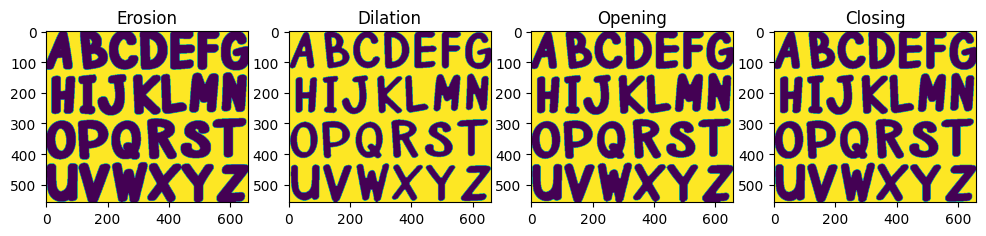

In [13]:
fig = plt.figure(figsize=(12,6))
fig.add_subplot(1,4,1)
plt.imshow(erosion)
plt.title("Erosion")
fig.add_subplot(1,4,2)
plt.imshow(dilation)
plt.title("Dilation")
fig.add_subplot(1,4,3)
plt.imshow(opening)
plt.title("Opening")
fig.add_subplot(1,4,4)
plt.imshow(closing)
plt.title("Closing")


## Subsampling

The key idea in image sub sampling is to throw away every other row and column to create a half size image. When the sampling rate gets too low, we are not able to capture the details in the image anymore.

Instead, we should have a minimum signal/image rate, called the Nyquist rate.

Using Shannons Sampling Theorem, the minimum sampling should be such that

    fs >= 2fmax

In [19]:
image = cv2.imread('resources\input.jpg', cv2.IMREAD_GRAYSCALE)

down_scaling_factor = 0.5
up_scaling_factor = 2

down_subsampled_image = cv2.resize(image, None, fx = down_scaling_factor, fy = down_scaling_factor, interpolation=cv2.INTER_AREA)
up_subsampled_image = cv2.resize(image,None, fx = up_scaling_factor, fy= up_scaling_factor, interpolation= cv2.INTER_AREA )

'''fig = plt.figure(figsize=(12,6))
fig.add_subplot(1,2,1)
plt.imshow(down_subsampled_image)
plt.title("Down sampled")
fig.add_subplot(1,2,2)
plt.imshow(up_subsampled_image)
plt.title("up sampled")'''

cv2.imshow("original image", image)
cv2.imshow("down_subsampled_image",down_subsampled_image)
cv2.imshow("up_subsampled_image",up_subsampled_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Aliasing

Aliasing happens when the image contains high-frequency details (like sharp edges, fine textures, or repeating patterns), and these details are not properly captured when the image resolution is reduced. In essence, the higher frequency components are "misrepresented" during the downsampling process.

One effective way to prevent aliasing during subsampling is to apply a low-pass filter (or smoothing filter) before downsampling. This filter reduces the high-frequency components of the image, making it less prone to aliasing. In practice, a Gaussian Blur is commonly used for this purpose.

#### Algorithm for downsampling to avoid aliasing

1. Start with an Image of Size (h, w)
Let the original image be denoted as image(h, w), where:

h is the height (number of rows),
w is the width (number of columns).

2. Apply a Low-Pass Filter
To prevent aliasing, apply a Gaussian low-pass filter. This step removes high-frequency components (like sharp edges and fine textures) from the image.The low-pass filter can be defined using a Gaussian kernel with a size of 7x7 and a standard deviation of 1.

3. Sample Every Other Pixel
After applying the blur, downsample the image by keeping every second pixel in both dimensions (horizontally and vertically). This reduces the image size by half.

4. Repeat for multiple levels, typically until the image becomes very small.


In [24]:
def downsample_image(image, levels):
    pyramid = [image]  # Start with original image
    for _ in range(levels):
        # Apply Gaussian blur
        blurred = cv2.GaussianBlur(pyramid[-1], (7, 7), 1)
        # Downsample by a factor of 2
        downsampled = cv2.pyrDown(blurred)
        pyramid.append(downsampled)
    return pyramid

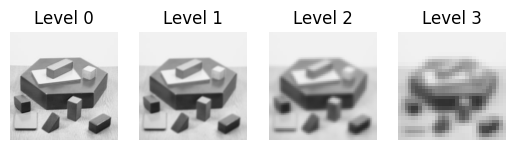

In [28]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

downsampled_images = downsample_image(image,3)

for i, img in enumerate(downsampled_images):
    plt.subplot(1, len(downsampled_images), i + 1)
    plt.imshow(img)
    plt.title(f'Level {i}')
    plt.axis('off')

plt.show()

### Image filtering in Frequency Domain

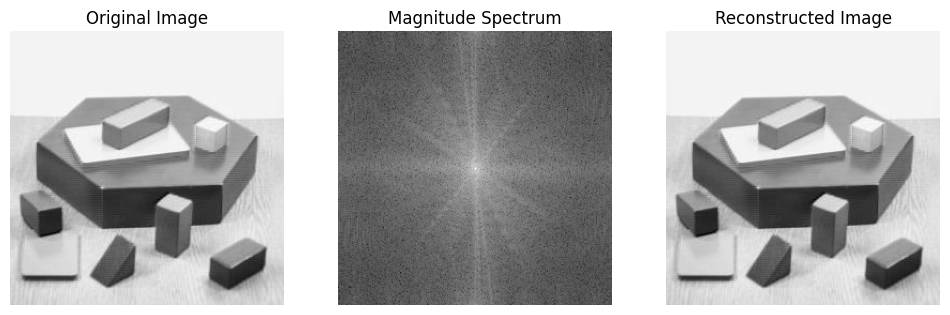

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('resources\input.jpg', 0)  # Load as grayscale

# Perform the Discrete Fourier Transform (DFT)
dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)

# Shift the zero frequency component (DC component) to the center
dft_shift = np.fft.fftshift(dft)

# Calculate magnitude spectrum for visualization
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

# Inverse Fourier Transform (IDFT)
dft_shift_inverse = np.fft.ifftshift(dft_shift)  # Shift back the DC component
image_back = cv2.idft(dft_shift_inverse)         # Apply inverse DFT
image_back = cv2.magnitude(image_back[:, :, 0], image_back[:, :, 1])  # Compute the magnitude

# Normalize the inverse image to be in the range of 0 to 255 for visualization
image_back = cv2.normalize(image_back, None, 0, 255, cv2.NORM_MINMAX)

# Plot the original image, the magnitude spectrum, and the reconstructed image
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(image_back, cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')

plt.show()


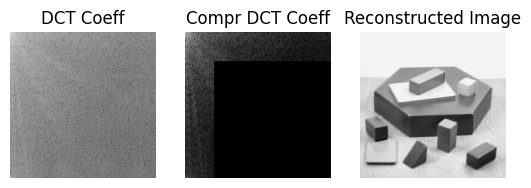

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('resources\input.jpg', 0)

# Get the image dimensions (height and width)
h, w = image.shape

# Apply DCT (Discrete Cosine Transform)
dct_image = cv2.dct(np.float32(image))  # Convert image to float32 before DCT

# Visualize the original DCT coefficients
plt.subplot(1, 3, 1)
plt.imshow(np.log(abs(dct_image)), cmap='gray')
plt.title('DCT Coeff')
plt.axis('off')

# DCT Compression: Zero out high-frequency coefficients
# Retain only a small fraction of low-frequency components for compression
compression_factor = 0.2  # Adjust the compression factor (0.0 to 1.0)
dct_compressed = np.copy(dct_image)
dct_compressed[int(h * compression_factor):, int(w * compression_factor):] = 0

# Visualize the compressed DCT coefficients
plt.subplot(1, 3, 2)
plt.imshow(np.log(abs(dct_compressed) + 1), cmap='gray')
plt.title('Compr DCT Coeff')
plt.axis('off')

# Apply Inverse DCT (IDCT) to reconstruct the compressed image
image_compressed = cv2.idct(dct_compressed)

# Normalize the reconstructed image for display
image_compressed = cv2.normalize(image_compressed, None, 0, 255, cv2.NORM_MINMAX)
image_compressed = np.uint8(image_compressed)

# Visualize the reconstructed image
plt.subplot(1, 3, 3)
plt.imshow(image_compressed, cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')

plt.show()
